In [1]:
from lab1 import *
import matplotlib.pyplot as plt

In [2]:
part1 = Particle()

iter_num = 1000

for i in range(iter_num):
    part1.make_step()

print(part1.lista_y)

[0, -0.15920792076500034, -0.7188050552643693, -0.16588703597785937, -0.9059047613283969, 0.16974211255817007, -0.9453369172310561, -0.4300144336744448, -0.9644300049567895, -0.17220917516507395, -1.623180454843121, -2.295662222328089, -0.8089281128337296, -1.894051785895573, -2.282956847650774, -3.5120953607974603, -3.8600096255235057, -3.9360345863503867, -3.433747036622331, -4.121862972253676, -4.841272382043769, -6.4261262324553705, -7.832446516971473, -7.329940198777088, -6.978959456539627, -5.6074942796629035, -4.699691516856026, -5.206206634570149, -6.547667540639464, -7.09632412196623, -8.928784927544518, -9.85917502546226, -9.298966561498522, -10.296486342097396, -10.302943553633668, -10.795334634625437, -11.289721836004725, -10.062175874748045, -9.928020238203818, -9.828844164915294, -10.238611414587105, -10.132542867983247, -9.824924871855298, -11.75749688473535, -12.054605224669707, -13.19672644964751, -11.807076670619427, -13.078780818894927, -10.35756471746165, -11.607507

Text(0.5, 1.0, 'Single cell movement after 1000 iterations')

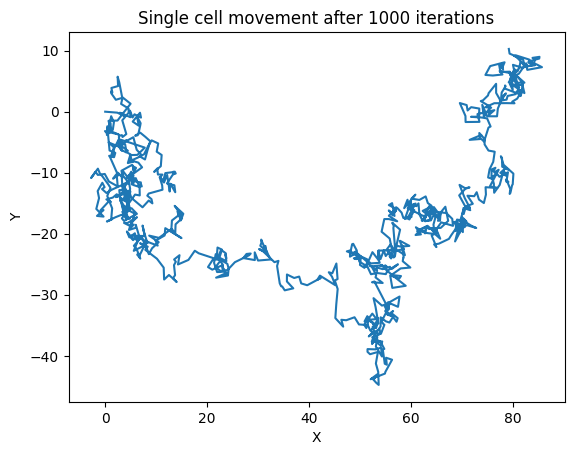

In [3]:
plt.plot(part1.lista_x, part1.lista_y)
plt.xlabel("X")
plt.ylabel("Y")
plt.title(f"Single cell movement after {iter_num} iterations")

[ 1.          0.99754491  0.99525379 ... -0.00526314 -0.00354723
 -0.00182369]


Text(0.5, 1.0, 'Autocorellation of Brownian data')

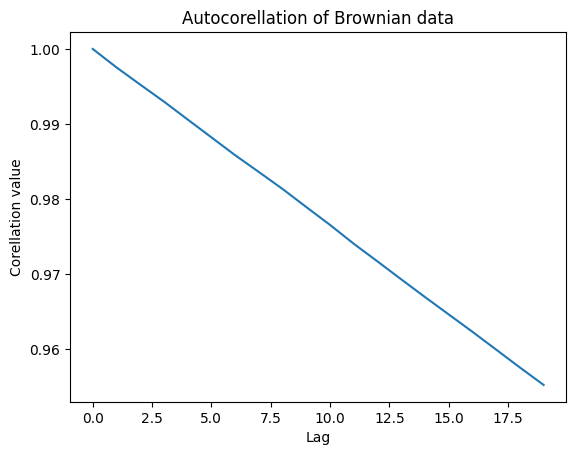

In [11]:

data = part1.lista_x

#data = np.random.uniform(0, 1, 1000)

x = np.array(data) 
# Mean
mean = np.mean(data)
# Variance
var = np.var(data)
# Normalized data
ndata = data - mean

acorr = np.correlate(ndata, ndata, 'full')[len(ndata)-1:] 
acorr = acorr / var / len(ndata)
print(acorr)
plt.plot(range(20), acorr[:20])
plt.xlabel("Lag")
plt.ylabel("Corellation value")
plt.title("Autocorellation of Brownian data")



Text(0.5, 1.0, 'Thousand particles movement after 100 iterations')

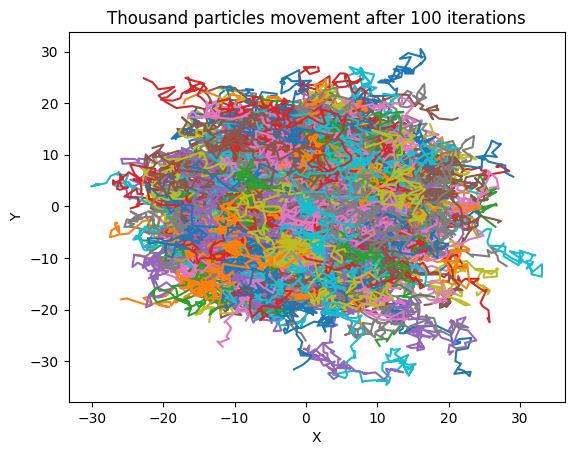

In [13]:
list_of_particles = [Particle() for i in range(1000)]
iter_num = 100

heat_maps = []

lista = []
for iter in range(iter_num):
    temp = []
    for part in list_of_particles:
        part.make_step()
        temp.append(part.calc_square())
    mean = np.mean(temp)
    lista.append(mean)

for part in list_of_particles:
    plt.plot(part.lista_x, part.lista_y)
plt.xlabel("X")
plt.ylabel("Y")
plt.title(f"Thousand particles movement after {iter_num} iterations")


Coef: [2.06995864]


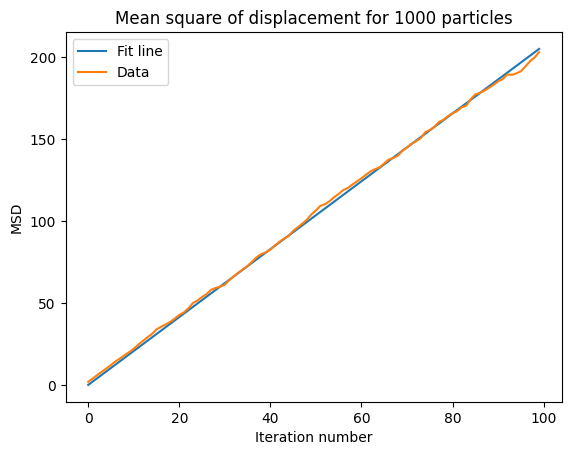

In [19]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression(fit_intercept=False)
x = [i for i in range(iter_num)]
x = np.array(x).reshape(-1, 1)

lr.fit(x, lista)

plt.plot(lr.coef_*x)
plt.plot(lista)
plt.xlabel("Iteration number")
plt.ylabel("MSD")
plt.title("Mean square of displacement for 1000 particles")
plt.legend(("Fit line", "Data"))

print(f"Coef: {lr.coef_}")